# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.02837581, 0.28340219, 0.74096711])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = "..."$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))    
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.5979542501672273

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p)= \frac{1}{2}\Sigma(-y_{i}log(\theta^{T}X_i)-(1-y_{i})log(1-\theta^{T}X_i))$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = (-(y * np.log(p) + (1 - y) * np.log(1 - p)))/2
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = (y - y_hat) ** 2 / 2
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.4793152790920594

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=$ $\sum (y_i - \theta^{T}X_i)(-X_{ij})$
## ${\partial\over{\partial \theta_j}}l(p)=$ $\sum (y_i - p_i)(-X_{ij})$

In [17]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = -(y - y_hat) * X[j]
    else:  # model == 'logistic'
        p = logistic(X, parameters)
        gradient = (p - y) * X[j]
    return gradient

In [18]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.12824773937329847

<div style="text-align: center;">
    <img src="./img/배치알고리즘구현.png" width="500"/><br>
</div>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [19]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [20]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[33.41797531331254, 8.82982734341497, 44.252933169888]

## mini-batch
인덱스로 미니 배치 나누기

In [21]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명

'batch_idx' 함수는 주어진 훈련 데이터 'X_train'을 배치 크기 'batch_size'에 따라 나누는 역할을 합니다. 

1. 전체 데이터의 크기 'N'을 구합니다.
2. 배치의 수 'nb'를 계산합니다. 이는 전체 데이터 크기를 배치 크기로 나눈 후 올림한 값입니다.
3. 'idx'는 데이터의 인덱스를 저장한 배열입니다.
4. 'idx_list'는 배치 크기만큼 인덱스를 나눈 결과를 저장한 리스트입니다. 

'batch_idx'는 주어진 훈련 데이터를 'batch_size' 크기의 배치로 나누고, 각 배치를 구성하는 데이터의 인덱스를 리스트로 반환합니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [22]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n

    parameters -= gradients
    return parameters

In [23]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.02614795, 0.28281354, 0.73801691])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:1번의 전체 데이터셋 순회
- num_epoch: 전체 데이터셋의 단일 순회 횟수
<br>

BGD: "학습 한 번(1 iteration)에 모든 데이터셋을 이용해 기울기를 업데이트"  
SGD: "학습 한 번(1 iteration)에 1개의 데이터를 이용해 기울기를 업데이트"  
MGD: "학습 한 번(1 iteration)에 데이터셋의 일부만 사용해 기울기를 업데이트"  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> "SGD"  
batch_size=k -> "MGD"  
batch_size=whole -> "BGD"  

In [41]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

- bs와 model을 바꿔가며 실행
    - bgd
        - logistic, bs = len(X_train)
        - mse_i, bs = len(X_train)
    - sgd
        - logistic, bs = 1
        - mse_i, bs = 1
    - mgd
        - logistic, bs = 16
        - mse_i, bs = 16

## Logistic Regression

In [25]:
# bs = len(X_train)
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'logistic', batch_size = len(X_train))
new_param_bgd

epoch: 0  loss: 0.5112822673086386  params: [0.76445286 0.14238737 0.5942951 ]  gradients: [0.03913379550368566, -0.00026148197484726485, 0.02345427109486312]
epoch: 100  loss: 0.237019184223578  params: [-0.78031363  0.72857333 -0.64761566]  gradients: [0.004351519621024282, -0.00685178787550589, 0.007145106213127092]
epoch: 200  loss: 0.20058930796445568  params: [-1.01391768  1.30391063 -1.22198945]  gradients: [0.0013687172040901462, -0.004806316602186472, 0.004712581442177354]
epoch: 300  loss: 0.183295993109268  params: [-1.12284437  1.71611694 -1.62434327]  gradients: [0.0009148836582256053, -0.0035570009689615055, 0.003457587287653997]
epoch: 400  loss: 0.1733840016130355  params: [-1.20480459  2.02980132 -1.92824611]  gradients: [0.0007420063012870483, -0.0027801069858872465, 0.0026844121555701836]
epoch: 500  loss: 0.1671118543017419  params: [-1.27288556  2.27983854 -2.16900151]  gradients: [0.0006263229369319368, -0.002257207246417486, 0.0021674062613488126]
epoch: 600  los

array([-1.49576922,  3.04932454, -2.90146548])

In [26]:
# bs = len(X_train)
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'mse_i', batch_size = len(X_train))
new_param_bgd

epoch: 0  loss: 0.24240293548464323  params: [0.4045131  0.0810173  0.39785183]  gradients: [0.03216302593373795, -0.0032487960036443153, 0.020116345798852645]
epoch: 100  loss: 0.6868662243177143  params: [-0.81878959  0.76808794 -0.69035007]  gradients: [0.003632528014003915, -0.006771303012442046, 0.006897510837229743]
epoch: 200  loss: 1.106144497540457  params: [-1.02405801  1.33292747 -1.25042274]  gradients: [0.0012819993307874758, -0.004713569199018178, 0.004617512539384812]
epoch: 300  loss: 1.4705187131215898  params: [-1.12875931  1.73777582 -1.64538416]  gradients: [0.000895197090015413, -0.0034992641673014385, 0.003400067377574485]
epoch: 400  loss: 1.8118879033956152  params: [-1.20941152  2.0467813  -1.94463692]  gradients: [0.000732779155611792, -0.0027421519989752853, 0.002646797911096781]
epoch: 500  loss: 2.1275274941229902  params: [-1.27673608  2.29364557 -2.18225672]  gradients: [0.0006199583867384634, -0.0022306120579058744, 0.002141206938607725]
epoch: 600  loss

array([-1.49772327,  3.0558685 , -2.90764017])

In [27]:
# bs = 1
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'logistic', batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.14100190985087824  params: [-0.86204411  1.05390639 -1.18394695]  gradients: [0.02542680879233122, 0.013837293664717835, 0.01789006725953809]
epoch: 100  loss: 0.038683365623396235  params: [-1.9303255   4.17501898 -4.06769065]  gradients: [0.0075385449830113116, 0.004102483390132461, 0.005304050456611032]
epoch: 200  loss: 0.03868133276150311  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521943802, 0.004102273621850841, 0.005303779249772613]
epoch: 300  loss: 0.0386813325918087  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767153, 0.004102273604340278, 0.00530377922713342]
epoch: 400  loss: 0.038681332591795084  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.038681332591795084  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 

array([-1.9303681 ,  4.17514311, -4.06780375])

In [28]:
# bs = 1
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'mse_i', batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.5782420495248112  params: [-0.83475437  0.89179421 -1.03179356]  gradients: [0.026343050867337903, 0.014335913478292779, 0.01853472670075087]
epoch: 100  loss: 3.1758671433348686  params: [-1.93032477  4.17501684 -4.06768871]  gradients: [0.007538551621280336, 0.0041024870026848135, 0.00530405512723566]
epoch: 200  loss: 3.1760071510621763  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159522497902, 0.004102273622152383, 0.005303779250162472]
epoch: 300  loss: 3.176007162749822  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767206, 0.004102273604340306, 0.005303779227133458]
epoch: 400  loss: 3.1760071627507633  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 3.1760071627507633  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 3.176007

array([-1.9303681 ,  4.17514311, -4.06780375])

In [29]:
# bs = 16
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'logistic', batch_size = 16)
new_param_mgd

epoch: 0  loss: 0.7273923603344071  params: [0.51672376 0.63689867 0.3886247 ]  gradients: [0.06398723085925156, 0.057989175176897306, 0.07284795588777629]
epoch: 100  loss: 0.09913555276187987  params: [-1.56170357  3.07180787 -3.01928585]  gradients: [0.007407895673926803, 0.01091367400182752, 0.014518487231155197]


array([-1.69614854,  3.53505687, -3.43389816])

In [30]:
# bs = 16
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'mse_i', batch_size = 16)
new_param_mgd

epoch: 0  loss: 0.7330115803047134  params: [0.28462876 0.53267424 0.47260543]  gradients: [0.05995641724825217, 0.055145408175523124, 0.07028188329381199]
epoch: 100  loss: 2.1625306004807068  params: [-1.55911557  3.06343011 -3.01132737]  gradients: [0.007415159645757658, 0.010918876604613803, 0.014539232590692482]
epoch: 200  loss: 2.9041609540102047  params: [-1.7728729   3.74398    -3.65384716]  gradients: [0.006972918999183556, 0.010563169813704065, 0.013073479399253017]
epoch: 300  loss: 3.267374904546566  params: [-1.86794289  4.04139961 -3.93219806]  gradients: [0.006855609533246799, 0.010445013183181917, 0.012555577810484263]
epoch: 400  loss: 3.458647291404302  params: [-1.91599773  4.19088856 -4.07156563]  gradients: [0.006809536188551604, 0.010392545897767258, 0.012319082626033878]
epoch: 500  loss: 3.5627272908258507  params: [-1.9416211   4.27039721 -4.14554839]  gradients: [0.006788032774435906, 0.010366317558727346, 0.012199278883274418]
epoch: 600  loss: 3.62029925097

array([-1.97156974,  4.36316463, -4.23174532])

### Predict Label

In [31]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [32]:
from sklearn.metrics import *

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [34]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [35]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [36]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [37]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.62431544, 2.54436027])

In [45]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate = 0.1, num_epoch = 1000, model = theta, batch_size = 16)
new_param

C:\Users\dhj98\AppData\Local\Temp\ipykernel_30176\1343608712.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
C:\Users\dhj98\AppData\Local\Temp\ipykernel_30176\3779599136.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if model == 'linear':


epoch: 0  loss: 0.3830986394874411  params: [1.57939104 1.13307121]  gradients: [-0.14126308189458628, -0.10855808379012842]
epoch: 100  loss: 9828.90137883321  params: [98.16553114 73.52701737]  gradients: [-0.12918364429841453, -0.10277977828899708]
epoch: 200  loss: 39321.501953284926  params: [194.65729948 145.88364403]  gradients: [-0.12918364429841453, -0.10277977828899708]
epoch: 300  loss: 88478.17872781138  params: [291.14906781 218.24027069]  gradients: [-0.12918364429841453, -0.10277977828899708]
epoch: 400  loss: 157298.93170241325  params: [387.64083614 290.59689735]  gradients: [-0.12918364429841453, -0.10277977828899708]
epoch: 500  loss: 245783.76087708864  params: [484.13260447 362.95352401]  gradients: [-0.12918364429841453, -0.10277977828899708]
epoch: 600  loss: 353932.66625183163  params: [580.62437281 435.31015067]  gradients: [-0.12918364429841453, -0.10277977828899708]
epoch: 700  loss: 481745.6478266434  params: [677.11614114 507.66677733]  gradients: [-0.12918

array([965.62652845, 724.01309104])

In [46]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

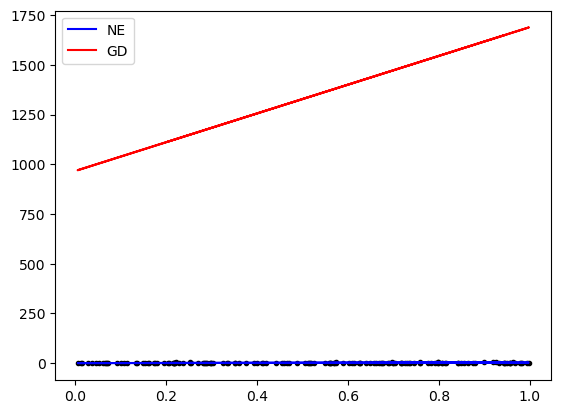

In [47]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()